In [17]:
import pandas as pd
import numpy as np
import os
import plotly.express as px
from sklearn.linear_model import LinearRegression
from scipy.stats import spearmanr
from math import sqrt
from statistics import mean

In [18]:
data_path = './data/'
df_X_train = pd.read_csv(data_path+'X_train.csv')#.drop(['COUNTRY'], axis=1).fillna(0) # given by the benchmark
df_X_test = pd.read_csv(data_path+'X_test.csv')
df_y_train = pd.read_csv(data_path+'Y_train.csv')

In [19]:
# French and Deutch sepration
df = pd.merge(df_X_train, df_y_train, on='ID')
df_X_train_fr = df.loc[df['COUNTRY'] == 'FR', df.columns[:-1]].drop(columns=['COUNTRY']).fillna(0)
df_y_train_fr = df.loc[df['COUNTRY'] == 'FR', ['ID', 'TARGET']]

df_X_train_de = df.loc[df['COUNTRY'] == 'DE', df.columns[:-1]].drop(columns=['COUNTRY']).fillna(0)
df_y_train_de = df.loc[df['COUNTRY'] == 'DE', ['ID', 'TARGET']]

df_X_test_fr = df_X_test.loc[df_X_test['COUNTRY'] == 'FR', df_X_test.columns].drop(columns=['COUNTRY']).fillna(0)
df_X_test_de = df_X_test.loc[df_X_test['COUNTRY'] == 'DE', df_X_test.columns].drop(columns=['COUNTRY']).fillna(0)


In [20]:
print(f"Number of samples for the french dataset: {df_X_train_fr.shape[0]}")
print(f"Number of samples for the german dataset: {df_X_train_de.shape[0]}")


Number of samples for the french dataset: 851
Number of samples for the german dataset: 643


<h3>Time series?</h3>

In [21]:
sorted_day_id = df_X_train_fr['DAY_ID'].to_list()
sorted_day_id.sort()
missing_day_ids = [day_id for day_id in list(range(0, 1216)) if day_id not in sorted_day_id]
print(1214 - len(df_X_train_fr)) # last_day_id less the number of samples -> number of missing days between id 1 and 1214
missing_day_ids

363


[4,
 6,
 9,
 10,
 13,
 17,
 19,
 24,
 30,
 32,
 33,
 35,
 39,
 43,
 44,
 45,
 51,
 54,
 56,
 63,
 67,
 69,
 79,
 80,
 84,
 85,
 95,
 100,
 103,
 111,
 113,
 115,
 123,
 128,
 129,
 132,
 133,
 136,
 139,
 142,
 148,
 153,
 156,
 160,
 161,
 164,
 167,
 171,
 173,
 174,
 176,
 177,
 190,
 193,
 196,
 200,
 202,
 208,
 210,
 211,
 213,
 216,
 218,
 226,
 233,
 234,
 235,
 241,
 244,
 245,
 252,
 254,
 255,
 256,
 259,
 260,
 261,
 265,
 271,
 275,
 288,
 291,
 295,
 299,
 300,
 301,
 306,
 316,
 317,
 324,
 326,
 332,
 334,
 338,
 339,
 342,
 350,
 352,
 358,
 360,
 369,
 370,
 372,
 373,
 375,
 376,
 382,
 386,
 388,
 390,
 392,
 394,
 395,
 397,
 402,
 404,
 405,
 407,
 410,
 411,
 415,
 421,
 428,
 432,
 433,
 435,
 438,
 440,
 441,
 447,
 448,
 451,
 452,
 455,
 458,
 459,
 464,
 468,
 472,
 475,
 477,
 483,
 484,
 485,
 488,
 489,
 499,
 502,
 507,
 513,
 518,
 520,
 524,
 527,
 528,
 531,
 532,
 541,
 546,
 548,
 551,
 559,
 563,
 569,
 570,
 571,
 572,
 576,
 577,
 588,
 590,
 597

In [22]:
sorted_day_id = df_X_train_de['DAY_ID'].to_list()
sorted_day_id.sort()
missing_day_ids = [day_id for day_id in list(range(0, 1216)) if day_id not in sorted_day_id]
print(1215 - df_X_test_de.shape[0]) # last_day_id less the number of samples -> number of missing days between id 1 and 1215
missing_day_ids

926


[0,
 1,
 4,
 6,
 9,
 10,
 13,
 15,
 17,
 18,
 19,
 24,
 28,
 29,
 30,
 32,
 33,
 35,
 39,
 43,
 44,
 45,
 47,
 48,
 50,
 51,
 52,
 54,
 56,
 58,
 59,
 63,
 64,
 65,
 67,
 69,
 75,
 76,
 79,
 80,
 84,
 85,
 89,
 90,
 91,
 95,
 100,
 103,
 110,
 111,
 113,
 114,
 115,
 119,
 123,
 125,
 126,
 128,
 129,
 132,
 133,
 136,
 138,
 139,
 140,
 141,
 142,
 145,
 148,
 151,
 153,
 156,
 157,
 159,
 160,
 161,
 164,
 167,
 171,
 173,
 174,
 176,
 177,
 182,
 185,
 186,
 190,
 193,
 196,
 197,
 200,
 202,
 206,
 208,
 210,
 211,
 212,
 213,
 215,
 216,
 218,
 224,
 226,
 227,
 228,
 233,
 234,
 235,
 238,
 241,
 242,
 244,
 245,
 248,
 249,
 252,
 254,
 255,
 256,
 259,
 260,
 261,
 264,
 265,
 271,
 273,
 275,
 283,
 288,
 291,
 295,
 299,
 300,
 301,
 303,
 306,
 308,
 312,
 313,
 314,
 316,
 317,
 321,
 322,
 323,
 324,
 326,
 332,
 334,
 335,
 338,
 339,
 342,
 343,
 350,
 352,
 354,
 358,
 360,
 362,
 366,
 367,
 368,
 369,
 370,
 372,
 373,
 375,
 376,
 379,
 382,
 383,
 385,
 386,
 388,
 

The data have a lot of missing values from day to day, the data are continuous over time, time series don't seems to be a good option

In [23]:
def show_spearman_correlation(y_predict, df_y_train):
    print(spearmanr(y_predict, df_y_train['TARGET']).correlation)

def get_spearman_cor(y_predict, df_y_train):
    return(spearmanr(y_predict, df_y_train['TARGET']).correlation)

Linear regression

In [24]:
model = LinearRegression()
df_X_train.drop(['COUNTRY'], axis=1).fillna(0)
# df_y_train['TARGET']
model.fit(df_X_train.drop(['COUNTRY'], axis=1).fillna(0), df_y_train['TARGET'])
# model.predict(df_X_train_fr)
show_spearman_correlation(model.predict(df_X_train.drop(['COUNTRY'], axis=1).fillna(0)), df_y_train)

0.278678665030059


french only

In [25]:
model = LinearRegression()
model.fit(df_X_train_fr, df_y_train_fr['TARGET'])
# model.predict(df_X_train_fr)
show_spearman_correlation(model.predict(df_X_train_fr), df_y_train_fr)

0.22230679657142144


de only

In [26]:
model = LinearRegression()
model.fit(df_X_train_de, df_y_train_de['TARGET'])
# model.predict(df_X_train_fr)
show_spearman_correlation(model.predict(df_X_train_de), df_y_train_de)

0.43857978910369905


Linear regression with regularization

In [27]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold, cross_val_score

fr

In [28]:
model = Ridge(alpha=10)
model.fit(df_X_train_fr, df_y_train_fr['TARGET'])
y_predict_fr = model.predict(df_X_train_fr)
print(f"spearman with alpha=10 : {get_spearman_cor(y_predict_fr, df_y_train_fr)}")

spearman with alpha=10 : 0.23177915829632


1e-09
0.5
1
10
100


1000
10000
100000.0


/home/charles-m/Projects/master/ML for networks/project/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.07539e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/charles-m/Projects/master/ML for networks/project/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.09632e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/charles-m/Projects/master/ML for networks/project/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.08802e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/charles-m/Projects/master/ML for networks/project/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matri

,alphas,cross-validation errors
0,1e-09,0.737425
1,0.5,0.736308
2,1,0.735943
3,10,0.733971
4,100,0.728906
5,1000,0.724144
6,10000,0.724342
7,100000.0,0.782527


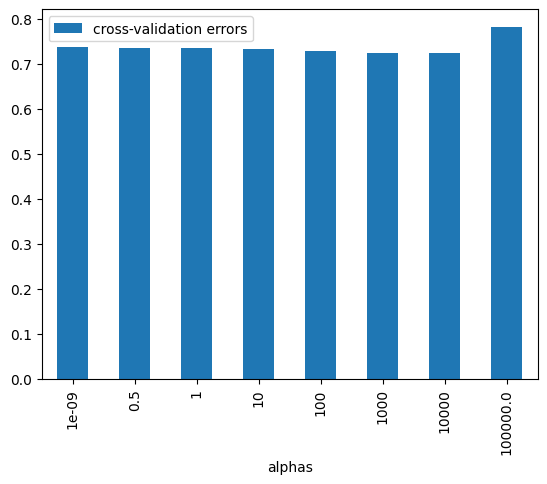

In [29]:
k_fold = KFold(n_splits=5, shuffle=True, random_state=10)

alphas = [1e-9, 0.5, 1, 10, 100, 1000, 10000, 1e5] #, 1e6]
errors = []
# alphas = [5, 10, 15, 20, 25, 30, 50, 100]
for a in alphas:
    print(a)
    scores = cross_val_score(Ridge(alpha=a),
                df_X_train_fr, df_y_train_fr, cv=k_fold,
                scoring = 'neg_mean_squared_error')
    errors.append(sqrt(mean(-scores) ) )

# We convert x-values to string because otherwise they would
# be to far from each other
df_errors = pd.DataFrame({'alphas':[str(a) for a in alphas],
                        'cross-validation errors':errors})
ax = df_errors.plot.bar(x='alphas')
df_errors

In numerical analysis, the condition number of a function measures how much the output value of the function can change for a small change in the input argument. This is used to measure how sensitive a function is to changes or errors in the output, and how much error in the output results from an error in the input.

In [30]:
model = Ridge(alpha=10)
model.fit(df_X_train_fr, df_y_train_fr['TARGET'])
y_predict_fr = model.predict(df_X_train_fr)
print(f"spearman with alpha=1000 : {get_spearman_cor(y_predict_fr, df_y_train_fr)}")

spearman with alpha=1000 : 0.23177915829632


de

In [31]:
model = Ridge(alpha=5) # 5 finded manually by trying several values
model.fit(df_X_train_de, df_y_train_de['TARGET'])
y_predict_de = model.predict(df_X_train_de)
print(f"spearman with alpha=5 : {get_spearman_cor(y_predict_de, df_y_train_de)}")

spearman with alpha=5 : 0.4414594599303667


Linear regression with cross validation

Polynomial regression

In [32]:
from sklearn.preprocessing import PolynomialFeatures
for i in range(2,5):
    poly_var = PolynomialFeatures(degree=i).fit_transform(df_X_train_fr)
    lr = LinearRegression()
    lr.fit(poly_var, df_y_train_fr['TARGET'])
    y_predict_fr = lr.predict(poly_var)
    print(f'result for polynomial degree {i}')
    show_spearman_correlation(y_predict_fr, df_y_train_fr)
    print()

result for polynomial degree 2
0.5399035699245784



result for polynomial degree 3
0.9999997274028819

result for polynomial degree 4
0.9999997274028819



In [33]:
from sklearn.preprocessing import PolynomialFeatures
for i in range(2,5):
    poly_var = PolynomialFeatures(degree=i).fit_transform(df_X_train_de)
    lr = LinearRegression()
    lr.fit(poly_var, df_y_train_de['TARGET'])
    y_predict_de = lr.predict(poly_var)
    print(f'result for polynomial degree {i}')
    show_spearman_correlation(y_predict_de, df_y_train_de)
    print()

result for polynomial degree 2
0.7735254179158632

result for polynomial degree 3
0.9999999548612647

result for polynomial degree 4
0.9999999548612647



In [34]:
x_train_fr = df_X_train_fr[:700]
y_train_fr = df_y_train_fr[:700]
x_test_fr = df_X_train_fr[700:]
y_test_fr = df_y_train_fr[700:]


poly_var = PolynomialFeatures(degree=2).fit_transform(x_train_fr)
print(poly_var.shape)
lr = LinearRegression()
lr.fit(poly_var, y_train_fr['TARGET'])
y_predict_fr = lr.predict(poly_var)

print(f"spearman correlation for the train dataset : {get_spearman_cor(y_predict_fr, y_train_fr)}")
poly_var_test = PolynomialFeatures(degree=2).fit_transform(x_test_fr)
print(poly_var_test.shape)
y_test_predict_fr = lr.predict(poly_var_test)

print(f"spearman correlation for the test dataset (unseen data) : {get_spearman_cor(y_test_predict_fr, y_test_fr)}")

(700, 630)
spearman correlation for the train dataset : 0.6191303014726739
(151, 630)
spearman correlation for the test dataset (unseen data) : -0.08157894736842104


In [35]:
data = [i for i in range(20)]
df_test = pd.DataFrame(data=data, columns=['my_col'])
pd.concat([df_test[0:0], df_test[12:18]])


,my_col
12,12
13,13
14,14
15,15
16,16
17,17


In [114]:
def cv_for_spearman_correlation_polynomial(n, df_x_set, df_y_set, polynomial_degree=2):
    x_set = df_x_set.copy()
    y_set = df_y_set.copy()
    x_set.reset_index(inplace=True)
    y_set.reset_index(inplace=True)
    rows = x_set.shape[0]
    spearman_results = []
    for i in range(n):
        x_train_set = pd.concat([x_set[0:round(i*rows/n)], x_set[round(i*rows/5+rows/n):851]])
        y_train_set = pd.concat([y_set[0:round(i*rows/n)], y_set[round(i*rows/5+rows/n):851]])
        x_test_set = x_set[round(i*rows/n):round(i*rows/5+rows/n)]
        y_test_set = y_set[round(i*rows/n):round(i*rows/5+rows/n)]
    
        poly_var_train = PolynomialFeatures(degree=polynomial_degree).fit_transform(x_train_set)
        lr = LinearRegression()
        lr.fit(poly_var_train, y_train_set['TARGET'])
        poly_var_test = PolynomialFeatures(degree=polynomial_degree).fit_transform(x_test_set)
        y_predict = lr.predict(poly_var_test)
        spearman_results.append(get_spearman_cor(y_predict, y_test_set))
    return spearman_results

for i in range(1, 3):
    print(f'POLYNOMIAL DEGREE {i}')
    print('FRANCE : ')
    results = cv_for_spearman_correlation_polynomial(5, df_X_train_fr, df_y_train_fr, i)
    print(results)
    results = [abs(r) for r in results]
    print(mean(results))
    print()
    print('GERMANY : ')
    results = cv_for_spearman_correlation_polynomial(5, df_X_train_de, df_y_train_de, i)
    print(results)
    results = [abs(r) for r in results]
    print(mean(results))
    print()
    print()

POLYNOMIAL DEGREE 1
FRANCE : 
[np.float64(0.17021310376295123), np.float64(0.022314226219918052), np.float64(0.09702425666444212), np.float64(0.07191577970334817), np.float64(0.09838362003163147)]
0.09197019727645821

GERMANY : 
[np.float64(0.26558027728085876), np.float64(0.2584920344259293), np.float64(0.4046567531305904), np.float64(0.32632530672038085), np.float64(0.24853533094812166)]
0.3007179405011762


POLYNOMIAL DEGREE 2
FRANCE : 
[np.float64(0.055272147268799705), np.float64(0.062462979586104146), np.float64(0.06220045167764974), np.float64(-0.017793003218104435), np.float64(-0.13892807200737664)]
0.06733133075160694

GERMANY : 
[np.float64(0.19138528622540255), np.float64(-0.05747573704449734), np.float64(-0.09420281753130592), np.float64(-0.004617972898736495), np.float64(-0.08694096601073346)]
0.08692455594213515


POLYNOMIAL DEGREE 3
FRANCE : 
[np.float64(-0.00014289151358794366), np.float64(0.006325071292920781), np.float64(-0.10418581655972732), np.float64(-0.1282808483

Polynomial regression with regularization

In [116]:

def cv_for_spearman_correlation_poly_with_regu(n, df_x_set, df_y_set, polynomial_degree=2, regularization=10):
    x_set = df_x_set.copy()
    y_set = df_y_set.copy()
    x_set.reset_index(inplace=True)
    y_set.reset_index(inplace=True)
    rows = x_set.shape[0]
    spearman_results = []
    for i in range(n):
        x_train_set = pd.concat([x_set[0:round(i*rows/n)], x_set[round(i*rows/5+rows/n):851]])
        y_train_set = pd.concat([y_set[0:round(i*rows/n)], y_set[round(i*rows/5+rows/n):851]])
        x_test_set = x_set[round(i*rows/n):round(i*rows/5+rows/n)]
        y_test_set = y_set[round(i*rows/n):round(i*rows/5+rows/n)]
    
        poly_var_train = PolynomialFeatures(degree=polynomial_degree).fit_transform(x_train_set)
        model = Ridge(alpha=regularization)
        model.fit(poly_var_train, y_train_set['TARGET'])
        poly_var_test = PolynomialFeatures(degree=polynomial_degree).fit_transform(x_test_set)
        y_predict = model.predict(poly_var_test)
        spearman_results.append(get_spearman_cor(y_predict, y_test_set))
    return spearman_results
for u in [1, 10, 50, 100, 1000, 10000, 1e5]:
    print(f'regularization term {u}')
    for i in range(1, 3):
        print(f'POLYNOMIAL DEGREE {i}')
        print('FRANCE : ')
        results = cv_for_spearman_correlation_poly_with_regu(5, df_X_train_fr, df_y_train_fr, i, u)
        print(results)
        results = [abs(r) for r in results]
        print(mean(results))
        print()
        print('GERMANY : ')
        results = cv_for_spearman_correlation_poly_with_regu(5, df_X_train_de, df_y_train_de, i, u)
        print(results)
        results = [abs(r) for r in results]
        print(mean(results))
        print()
        print()

regularization term 1
POLYNOMIAL DEGREE 1
FRANCE : 
[np.float64(0.17021310376295123), np.float64(0.031361557391564536), np.float64(0.10416661666724668), np.float64(0.07637838068893082), np.float64(0.0937549233333944)]
0.09517491636881753

GERMANY : 
[np.float64(0.28419051878354207), np.float64(0.260649377403406), np.float64(0.41642441860465124), np.float64(0.34788156930965025), np.float64(0.25188953488372096)]
0.3122070837969941


POLYNOMIAL DEGREE 2
FRANCE : 
[np.float64(0.00891667470688527), np.float64(0.06392364482385916), np.float64(0.02511585935125997), np.float64(0.04517436996598702), np.float64(-0.09467089233700333)]
0.047560288236998954

GERMANY : 
[np.float64(0.03584525939177102), np.float64(0.20356848562534333), np.float64(0.040172182468694105), np.float64(-0.007536394433253982), np.float64(0.2769286672629696)]
0.1128101978364064


regularization term 10
POLYNOMIAL DEGREE 1
FRANCE : 
[np.float64(0.1740430848451033), np.float64(0.03520129945469313), np.float64(0.10275782455647

Linear regression with different loss function

Polynomial regression with cross validation

Neural networks

<function print(*args, sep=' ', end='\n', file=None, flush=False)>

Bagging, Random Forest, Extra Trees, Boosting